In [1]:
using ProfileView
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [7]:
Ts=collect(150.01:20:1200.01)
#Ts=collect(663.8:0.01:664.0)#[663.0,663.1]
numofn=[-2.0e20,-1.7e20,-1.3e20]#,-7.3e19,-2.0e19,-0.15e19]#,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample e-1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1.5e18,1.8e18,2.3e18]#,1e17,1e17,1e17]#,1e17]
xs=[0.27,0.08,0.1]#,0.3,0.3,0.3]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=5.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x
alphan(var)=0.0#1/EgSiGe([Ts[1],xs[1]])
alphap(var)=0.0#1/EgSiGe([Ts[1],xs[1]])


effMassV(var)=-1.2*me
effMassC(var)=1.4/6^(2/3)*me#0.321me#0.424*me#0.424*me#1.4/6^(2/3)*me

bandC=parBandTx(true,1.0,effMassC(var0),alphan(var0),Ec(var0),[Ec],[effMassC],[alphan],var0)
bandV=parBandTx(true,1.0,effMassV(var0),alphap(var0),Ev(var0),[Ev],[effMassV],[alphap],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV

md=effMassC([Ts[1],xs[1]])*6^(2/3)#1.4*me;
function Deftemp(band::parBandTx)
    Da=10.0
    Dv=3.8
    if band==bandC
        return [Da,Dv]#10.5#15.0
    end
    if band==bandV        
        return [Dv,Da]#7.0
    end
end
ksi=21.0
#tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],Deftemp(var[6])[2],var[2],var[1],var[3],var[6])#DefP(var[1])
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[2]*1e6,bandV]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,tauII2,tauNI
xmax=3.0
#T_EF_Dict=Dict()
#println("-3")

3.0

In [8]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 31.012414 seconds (152.86 M allocations: 26.475 GiB, 7.03% gc time)


3.0

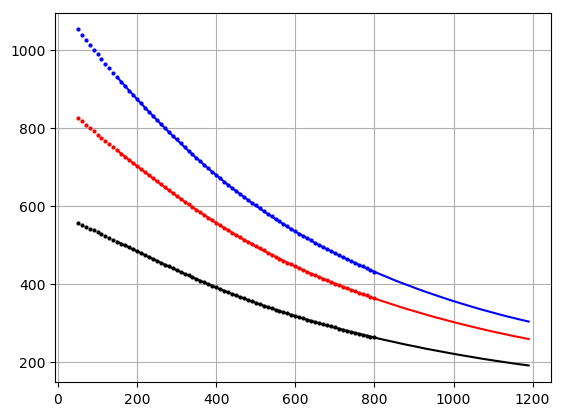

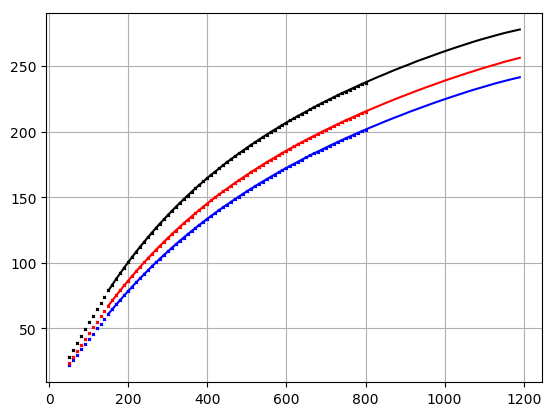

In [9]:
SiGe_Suin_EC_T=[50.0100000000000,60.0100000000000,70.0100000000000,80.0100000000000,90.0100000000000,100.010000000000,
110.010000000000,120.010000000000,130.010000000000,140.010000000000,150.010000000000,160.010000000000,170.010000000000,
180.010000000000,190.010000000000,200.010000000000,210.010000000000,220.010000000000,230.010000000000,240.010000000000,
250.010000000000,260.010000000000,270.010000000000,280.010000000000,290.010000000000,300.010000000000,310.010000000000,
320.010000000000,330.010000000000,340.010000000000,350.010000000000,360.010000000000,370.010000000000,380.010000000000,
390.010000000000,400.010000000000,410.010000000000,420.010000000000,430.010000000000,440.010000000000,450.010000000000,
460.010000000000,470.010000000000,480.010000000000,490.010000000000,500.010000000000,510.010000000000,520.010000000000,
530.010000000000,540.010000000000,550.010000000000,560.010000000000,570.010000000000,580.010000000000,590.010000000000,
600.010000000000,610.010000000000,620.010000000000,630.010000000000,640.010000000000,650.010000000000,660.010000000000,
670.010000000000,680.010000000000,690.010000000000,700.010000000000,710.010000000000,720.010000000000,730.010000000000,
740.010000000000,750.010000000000,760.010000000000,770.010000000000,780.010000000000,790.010000000000,800.010000000000]

SiGe_Suin_Green_EC_E=[197056.235797164,194320.869638783,191639.726004170,189004.089980826,186404.129258986,183831.389714421,
181278.561149160,178739.838327999,176211.078554261,173689.820032834,171175.087928433,168667.170965295,166167.387785872,
163677.780145979,161200.893579582,158739.569628146,156296.773858473,153875.463875003,151478.490325157,149108.525922849,
146768.017906391,144459.159338732,142183.875109414,139943.819068554,137740.379339050,135574.689421683,133447.643191776,
131359.912309890,129311.964919516,127304.084786733,125336.390268020,123408.852670586,121521.313710611,119673.501882254,
117865.047631702,116095.497291016,114364.325770554,112670.948039989,111014.729449324,109394.994954804,107811.037323671,
106262.124394220,104747.505469873,103266.416923878,101818.087088848,100401.740501025,99016.6015656697,97661.8977043105,
96336.8620403833,95040.7356748171,93772.7695985254,92532.2262843721,91318.3809970343,90130.5228553333,88967.9556780466,
87829.9986409496,86715.9867698647,85625.2712917903,84557.2198637538,83511.2166968223,82486.6625908072,81482.9748932318,
80499.5873949161,79535.9501727694,78591.5293893648,77665.8070576933,76758.2807785317,75868.4634569961,74995.8830040928,
74140.0820284097,73300.6175224935,72477.0605479449,71668.9959227969,70876.0219143384,70097.7499401889,69333.8042801100]

SiGe_Suin_Blue_EC_E=[105217.718423598,103894.351590207,102597.378241505,101326.103752608,100076.690205017,98847.7335877961,97637.2784136888,
96443.5832046020,95265.1079304967,94100.5283678664,92948.7829164667,91809.0016256134,90680.5818602652,89563.0857717702,
88456.2529938136,87359.9754708476,86274.2533521397,85199.1751237078,84134.8966696508,83081.6197375549,82039.5744885061,
81009.0055398650,79990.1607327244,78983.2822128468,77988.5995736031,77006.3247748143,76036.6485395295,75079.7379700720,
74135.7351443028,73204.7564993546,72286.8928226126,71382.2097211777,70490.7484441301,69612.5269642873,68747.5412407379,
67895.7665996923,67057.1591831364,66231.6574263637,65419.1835337387,64619.6449294639,63832.9356659927,63058.9377775023,
62297.5225696718,61548.5518400721,60811.8790258860,60087.3502775685,59374.8054585196,58674.0790719648,57985.0011169990,
57307.3978765571,56641.0926401712,55985.9063649732,55341.6582783843,54708.1664260703,54085.2481687875,53472.7206315772,
52870.4011089235,52278.1074291506,51695.6582813696,51122.8735081021,50559.5743665851,50005.5837616225,49460.7264527182,
48924.8292380895,48397.7211180361,47879.2334400197,47369.2000276938,46867.4572960151,46373.8443544707,45888.2031003578,
45410.3783039662,44940.2176874331,44477.5719989557,44022.2950840000,43574.2439550117,43133.2788611721]

SiGe_Suin_Pink_EC_E=[82556.0023800115,81678.0385079951,80812.0296722989,79958.1987557615,79114.3165600192,78278.9254780743,
77450.6590202426,76628.3230121537,75810.9323951141,74997.7248530249,74188.1713761495,73381.9573163729,72578.9419993544,
71779.1589659886,70982.7628736542,70190.0062645706,69401.2154894147,68616.7659645658,67837.0623647944,67062.5228167014,
66293.5661792147,65530.6020846545,64774.0234115581,64024.2008027958,63281.4788707468,62546.1737643178,61818.5718199933,
61098.9290655626,60387.4713801360,59684.3951499867,58989.8682891142,58304.0315192323,57626.9998243901,56958.8640138868,
56299.6923412270,55649.5321389090,55008.4114384640,54376.3405529461,53753.3136053002,53139.3099909937,52534.2957672122,
51938.2249639862,51351.0408150007,50772.6769076076,50203.0582531140,49642.1022791472,49089.7197469245,48545.8155965934,
48010.2897242368,47483.0376942108,46963.9513907803,46452.9196128161,45949.8286153999,45454.5626020447,44967.0041711185,
44487.0347199124,44014.5348096343,43549.3844944385,43091.4636174350,42640.6520764505,42196.8300621479,41759.8782709546,41329.6780950939,
40906.1117918765,40489.0626342670,40078.4150446369,39674.0547134453,39275.8687045742,38883.7455488544,38497.5753272869,38117.2497453651,
37742.6621998331,37373.7078391482,37010.2836188567,36652.2883530403,36299.6227629359]

SiGe_Suin_Black_EC_E=[55622.0110551947,55136.9987140034,54655.7461666811,54176.7050907652,53698.6859337766,53220.6435980166,52741.7187796517,
52261.2715226442,51778.9154868774,51294.4685778328,50807.9540688773,50319.5522408717,49829.5628688318,49338.3759903383,
48846.4405788305,48354.2400831509,47862.2731101948,47371.0382839007,46881.0228407008,46392.6943614876,45906.4950443235,
45422.8379814638,44942.1049992142,44464.6456911390,43990.7773463343,43520.7855346351,43054.9251603354,42593.4218378963,
42136.4734762196,41684.2519849564,41236.9050375587,40794.5578425274,40357.3148874124,39925.2616303102,39498.4661214778,
39076.9805436780,38660.8426645807,38250.0771978062,37844.6970719553,37444.7046087412,37050.0926127418,36660.8453761445,
36276.9396026062,35898.3452545883,35525.0263288096,35156.9415644886,34794.0450890119,34436.2870055533,34083.6139270076,
33735.9694604076,33393.2946457800,33055.5283531661,32722.6076413099,32394.4680812822,32071.0440481056,31752.2689831920,
31438.0756302719,31128.3962472375,30823.1627961888,30522.3071137963,30225.7610639480,29933.4566745123,29645.3262599303,
29361.3025312366,29081.3186950153,28805.3085427084,28533.2065316193,28264.9478588865,28000.4685296476,27739.7054205593,
27482.5963398025,27229.0800846594,26979.0964977225,26732.5865227674,26489.4922612983,26249.7570307576]

SiGe_Suin_Blue_SC_S=[-21.7523104187788,-25.9457204002138,-30.0885220308013,-34.1752109691754,-38.2059474144304,
-42.1797418609697,-46.0954759095530,-49.9518978637138,-53.7477624431973,-57.4819058446367,-61.1533311583672,
-64.7612422247736,-68.3050547503879,-71.7845188779827,-75.1995705465003,-78.5504115593362,-81.8374802613841,
-85.0614045329619,-88.2229816539391,-91.3231552953944,-94.3629887985398,-97.3436405915296,-100.266342677214,-103.132381777112,
-105.943082893110,-108.699795171442,-111.403879920946,-114.056700579642,-116.659614414779,-119.213965736556,-121.721080428019,
-124.182261597514,-126.598786191152,-128.971902415277,-131.302827839417,-133.592748066665,-135.842815874843,-138.054150745006,
-140.227838706636,-142.364932439552,-144.466451581937,-146.533383201924,-148.566682397137,-150.567272992435,-152.536048311113,
-154.473871999049,-156.381578884797,-158.259975861592,-160.109842779774,-161.931933339902,-163.726975978875,-165.495674742295,
-167.238710137589,-168.956739963088,-170.650400108826,-172.320305325328,-173.967049956605,-175.591208633931,-177.193336926711,
-178.773971946652,-180.333632901168,-181.872821591559,-183.392022851104,-184.891704917703,-186.372319735156,-187.834303176590,
-189.278075182972,-190.704039808980,-192.112585167937,-193.504083266858,-194.878889722103,-196.237343345530,-197.579765590541,
-198.906459846879,-200.217710572716,-201.513782252026]

SiGe_Suin_Pink_SC_S=[-23.9499856092501,-28.5862197803218,-33.1642400862037,-37.6838942251103,-42.1417891074287,
-46.5354848035996,-50.8622421316613,-55.1193861772030,-59.3044095674959,-63.4152345459587,-67.4500696522240,
-71.4077208901757,-75.2873965709307,-79.0887646432600,-82.8119326519797,-86.4573644907467,-90.0258385322594,
-93.5184002417533,-96.9363116028287,-100.281005956880,-103.554048716190,-106.757103269786,-109.891901788896,
-112.960220623040,-115.963859843036,-118.904626440842,-121.784320698673,-124.604725267716,-127.367596543106,
-130.074657967341,-132.727594941413,-135.328051066670,-137.877625481650,-140.377871093353,-142.830293534574,
-145.236350706119,-147.597452786277,-149.914962609895,-152.190196336330,-154.424424339805,-156.618872267610,
-158.774722221604,-160.893114026721,-162.975146557200,-165.021879096728,-167.034332713749,-169.013491636757,
-170.960304617744,-172.875686274481,-174.760518404568,-176.615651265625,-178.441904817611,-180.240069924170,
-182.010909510748,-183.755159677845,-185.473530768178,-187.166708386816,-188.835354373476,-190.480107726201,
-192.101585475562,-193.700383508339,-195.277077339430,-196.832222830361,-198.366356852445,-199.879997892153,-201.373646595803,
-202.847786250179,-204.302883195038,-205.739387162987,-207.157731541534,-208.558333551541,-209.941594335643,
-211.307898949608,-212.657616248962,-213.991098662638,-215.308681844780]

SiGe_Suin_Black_SC_S=[-28.1599769459265,-33.6192218367073,-39.0090505459788,-44.3236547272048,-49.5568977453714,
-54.7025528560025,-59.7547463145185,-64.7084385641298,-69.5594720018437,-74.3049058184381,-78.9427940698786,
-83.4722516345093,-87.8932622874908,-92.2065532487622,-96.4134649761981,-100.515820970825,-104.515815041831,
-108.415915324588,-112.218783783354,-115.927210057589,-119.544058018839,-123.072223240943,-126.514599634887,
-129.874053670756,-133.153404805842,-136.355410939410,-139.482757904828,-142.538052178320,-145.523816131048,
-148.442485275873,-151.296407064680,-154.087840878582,-156.818958924410,-159.491847808778,-162.108510608091,
-164.670869290979,-167.180767380094,-169.639972765156,-172.050180598578,-174.413016220957,-176.730038076169,
-179.002740585939,-181.232556961430,-183.420861935853,-185.568974406845,-187.678159981188,-189.749633417410,
-191.784560963976,-193.784062592523,-195.749214126718,-197.681049268238,-199.580561521835,-201.448706021787,
-203.286401262075,-205.094530732516,-206.873944462887,-208.625460476565,-210.349866154819,-212.047919512199,
-213.720350382789,-215.367861516277,-216.991129581930,-218.590806077618,-220.167518140008,-221.721869251003,
-223.254439834386,-224.765787735464,-226.256448575369,-227.726935970430,-229.177741605876,-230.609335151900,
-232.022164008944,-233.416652867900,-234.793203069827,-236.152191748693,-237.493970739658]

figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="b")
plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E/100,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

In [1]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))

LoadError: [91mUndefVarError: Ts not defined[39m